In [23]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [24]:
play_tennis = pd.read_csv('PlayTennis.csv')
play_tennis

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [25]:
number = LabelEncoder()
play_tennis['Outlook'] = number.fit_transform(play_tennis['Outlook'])
play_tennis['Temperature'] = number.fit_transform(play_tennis['Temperature'])
play_tennis['Humidity'] = number.fit_transform(play_tennis['Humidity'])
play_tennis['Wind'] = number.fit_transform(play_tennis['Wind'])
play_tennis['Play Tennis'] = number.fit_transform(play_tennis['Play Tennis'])

In [26]:
#Let's create numpy arrays for features and target
X = play_tennis.drop('Play Tennis',axis=1).values
y = play_tennis['Play Tennis'].values

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

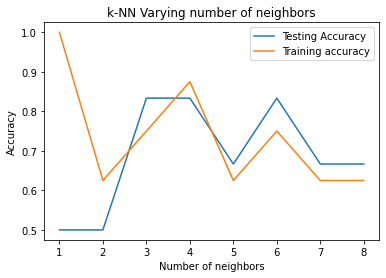

In [29]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [34]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=4)

In [35]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [36]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.8333333333333334

In [37]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [38]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [39]:
confusion_matrix(y_test,y_pred)


array([[2, 0],
       [1, 3]], dtype=int64)

In [40]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6

